<a href="https://colab.research.google.com/github/RockChamps/Heart-Disease-Prediction-System/blob/main/myPRACTICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Desease Prediction System

In [4]:
# IMPORTING NECESSORY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
#Loading MY dataframe
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#printinng the herad
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#getting the isnull values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# getting the tail values
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# if the zeros are presnt it willl print here
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
df = df.fillna(df.median())

In [10]:
# so what we do is here we drop out the target colum and then we put it in y variable
X = df.drop("target", axis=1)
y = df["target"]

In [11]:
# scaling is very important
# we used the standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy =", accuracy_score(y_test, y_pred))


Accuracy = 0.8852459016393442


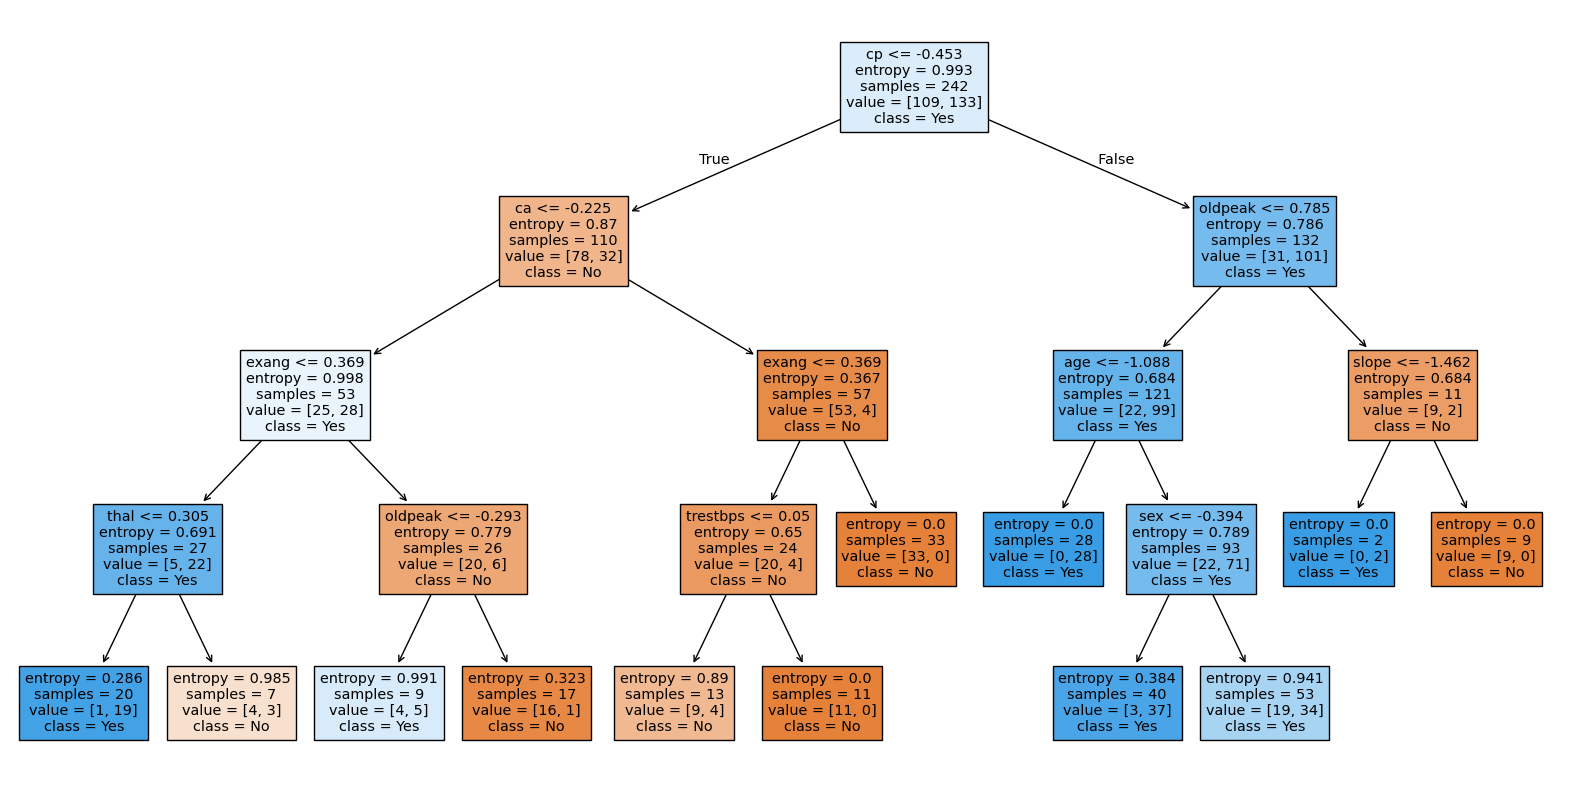

In [16]:
# this is the decision tree classifier
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()


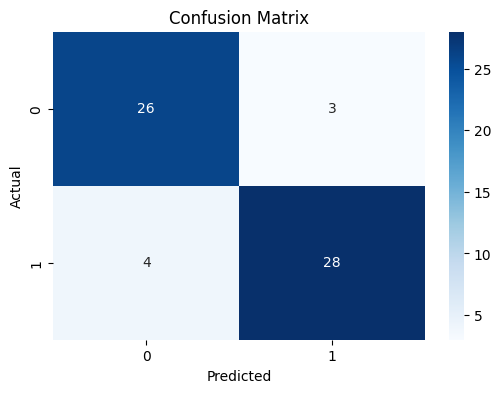

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X_scaled,
    y,
    cv=10,
    scoring="accuracy"
)

print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.7755913978494624


In [19]:
import joblib

joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [20]:
pip install fastapi uvicorn joblib scikit-learn numpy


In [21]:
from fastapi import FastAPI
import joblib
import numpy as np

app = FastAPI(title="Heart Disease Prediction API")

# Load model & scaler
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

@app.get("/")
def home():
    return {"message": "Heart Disease Prediction API"}

@app.post("/predict")
def predict(data: dict):
    features = np.array([list(data.values())])
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)

    return {
        "Heart Disease": "YES" if prediction[0] == 1 else "NO"
    }


In [45]:
from fastapi import FastAPI, Form
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import numpy as np
import joblib

# Initialize FastAPI app
app = FastAPI(title="Heart Disease Prediction System")

# Load trained model and scaler
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

# =========================
# Pydantic model (API use)
# =========================
class HeartInput(BaseModel):
    age: int
    sex: int
    cp: int
    trestbps: int
    chol: int
    fbs: int
    restecg: int
    thalach: int
    exang: int
    oldpeak: float
    slope: int
    ca: int
    thal: int

# =========================
# UI Home Page
# =========================
@app.get("/", response_class=HTMLResponse)
def home():
    return """
    <html>
    <head>
        <title>Heart Disease Prediction</title>
        <style>
            body {
                font-family: Arial;
                background: #f4f6f8;
            }
            .card {
                width: 520px;
                margin: 40px auto;
                background: white;
                padding: 25px;
                border-radius: 10px;
                box-shadow: 0 0 15px rgba(0,0,0,0.1);
            }
            h2 {
                text-align: center;
                color: #e63946;
            }
            input, select, button {
                width: 100%;
                padding: 10px;
                margin: 6px 0;
            }
            button {
                background: #1d3557;
                color: white;
                border: none;
                cursor: pointer;
            }
        </style>
    </head>
    <body>
        <div class="card">
            <h2>Heart Disease Prediction</h2>
            <form action="/predict-form" method="post">

                <input name="age" placeholder="Age" required>
                <input name="sex" placeholder="Sex (1=Male, 0=Female)" required>
                <input name="cp" placeholder="Chest Pain Type (0-3)" required>
                <input name="trestbps" placeholder="Resting Blood Pressure" required>
                <input name="chol" placeholder="Cholesterol" required>
                <input name="fbs" placeholder="Fasting Blood Sugar (1/0)" required>
                <input name="restecg" placeholder="Rest ECG (0-2)" required>
                <input name="thalach" placeholder="Max Heart Rate" required>
                <input name="exang" placeholder="Exercise Induced Angina (1/0)" required>
                <input name="oldpeak" placeholder="Oldpeak" required>
                <input name="slope" placeholder="Slope (0-2)" required>
                <input name="ca" placeholder="Major Vessels (0-3)" required>
                <input name="thal" placeholder="Thal (1-3)" required>

                <button type="submit">Predict</button>
            </form>
        </div>
    </body>
    </html>
    """

# =========================
# UI Prediction Endpoint
# =========================
@app.post("/predict-form", response_class=HTMLResponse)
def predict_form(
    age: int = Form(...),
    sex: int = Form(...),
    cp: int = Form(...),
    trestbps: int = Form(...),
    chol: int = Form(...),
    fbs: int = Form(...),
    restecg: int = Form(...),
    thalach: int = Form(...),
    exang: int = Form(...),
    oldpeak: float = Form(...),
    slope: int = Form(...),
    ca: int = Form(...),
    thal: int = Form(...)
):
    features = np.array([[age, sex, cp, trestbps, chol, fbs,
                          restecg, thalach, exang, oldpeak,
                          slope, ca, thal]])

    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    result = "❤️ Heart Disease Detected" if prediction == 1 else "✅ No Heart Disease"

    return f"""
    <h2 style="text-align:center;margin-top:40px;">{result}</h2>
    <p style="text-align:center;">Risk Probability: {probability:.2f}</p>
    <p style="text-align:center;"><a href="/">Predict Again</a></p>
    """

# =========================
# API Prediction (JSON)
# =========================
@app.post("/predict")
def predict_api(data: HeartInput):
    features = np.array([[
        data.age, data.sex, data.cp, data.trestbps,
        data.chol, data.fbs, data.restecg,
        data.thalach, data.exang, data.oldpeak,
        data.slope, data.ca, data.thal
    ]])

    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    return {
        "prediction": int(prediction),
        "probability": round(float(probability), 2)
    }


In [27]:
!pip install fastapi uvicorn nest-asyncio pyngrok joblib scikit-learn numpy


In [46]:
from fastapi import FastAPI, Form
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
import numpy as np
import joblib

# Initialize FastAPI app
app = FastAPI(title="Heart Disease Prediction System")

# Load trained model and scaler
model = joblib.load("heart_model.pkl")
scaler = joblib.load("scaler.pkl")

# =========================
# Pydantic model (API use)
# =========================
class HeartInput(BaseModel):
    age: int
    sex: int
    cp: int
    trestbps: int
    chol: int
    fbs: int
    restecg: int
    thalach: int
    exang: int
    oldpeak: float
    slope: int
    ca: int
    thal: int

# =========================
# UI Home Page
# =========================
@app.get("/", response_class=HTMLResponse)
def home():
    return """
    <html>
    <head>
        <title>Heart Disease Prediction</title>
        <style>
            body {
                font-family: Arial;
                background: #f4f6f8;
            }
            .card {
                width: 520px;
                margin: 40px auto;
                background: white;
                padding: 25px;
                border-radius: 10px;
                box-shadow: 0 0 15px rgba(0,0,0,0.1);
            }
            h2 {
                text-align: center;
                color: #e63946;
            }
            input, select, button {
                width: 100%;
                padding: 10px;
                margin: 6px 0;
            }
            button {
                background: #1d3557;
                color: white;
                border: none;
                cursor: pointer;
            }
        </style>
    </head>
    <body>
        <div class="card">
            <h2>Heart Disease Prediction</h2>
            <form action="/predict-form" method="post">

                <input name="age" placeholder="Age" required>
                <input name="sex" placeholder="Sex (1=Male, 0=Female)" required>
                <input name="cp" placeholder="Chest Pain Type (0-3)" required>
                <input name="trestbps" placeholder="Resting Blood Pressure" required>
                <input name="chol" placeholder="Cholesterol" required>
                <input name="fbs" placeholder="Fasting Blood Sugar (1/0)" required>
                <input name="restecg" placeholder="Rest ECG (0-2)" required>
                <input name="thalach" placeholder="Max Heart Rate" required>
                <input name="exang" placeholder="Exercise Induced Angina (1/0)" required>
                <input name="oldpeak" placeholder="Oldpeak" required>
                <input name="slope" placeholder="Slope (0-2)" required>
                <input name="ca" placeholder="Major Vessels (0-3)" required>
                <input name="thal" placeholder="Thal (1-3)" required>

                <button type="submit">Predict</button>
            </form>
        </div>
    </body>
    </html>
    """

# =========================
# UI Prediction Endpoint
# =========================
@app.post("/predict-form", response_class=HTMLResponse)
def predict_form(
    age: int = Form(...),
    sex: int = Form(...),
    cp: int = Form(...),
    trestbps: int = Form(...),
    chol: int = Form(...),
    fbs: int = Form(...),
    restecg: int = Form(...),
    thalach: int = Form(...),
    exang: int = Form(...),
    oldpeak: float = Form(...),
    slope: int = Form(...),
    ca: int = Form(...),
    thal: int = Form(...)
):
    features = np.array([[age, sex, cp, trestbps, chol, fbs,
                          restecg, thalach, exang, oldpeak,
                          slope, ca, thal]])

    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    result = "❤️ Heart Disease Detected" if prediction == 1 else "✅ No Heart Disease"

    return f"""
    <h2 style="text-align:center;margin-top:40px;">{result}</h2>
    <p style="text-align:center;">Risk Probability: {probability:.2f}</p>
    <p style="text-align:center;"><a href="/">Predict Again</a></p>
    """

# =========================
# API Prediction (JSON)
# =========================
@app.post("/predict")
def predict_api(data: HeartInput):
    features = np.array([[
        data.age, data.sex, data.cp, data.trestbps,
        data.chol, data.fbs, data.restecg,
        data.thalach, data.exang, data.oldpeak,
        data.slope, data.ca, data.thal
    ]])

    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0][1]

    return {
        "prediction": int(prediction),
        "probability": round(float(probability), 2)
    }


In [47]:
from pyngrok import ngrok

ngrok.set_auth_token("39tBO8l7FRDmSvOuah2L9kxEN9d_6Yr3RWk4R2jp9KX5zPR77")


In [48]:
import subprocess
import time
from pyngrok import ngrok

# Start FastAPI server in background
subprocess.Popen([
    "uvicorn", "main:app",
    "--host", "0.0.0.0",
    "--port", "8000"
])

time.sleep(3)

# Create tunnel
public_url = ngrok.connect(8000)
print("Swagger UI:", public_url.public_url + "/docs")



Swagger UI: https://unretired-preston-moribundly.ngrok-free.dev/docs


In [50]:
from pyngrok import ngrok

ngrok.kill()


In [51]:
public_url = ngrok.connect(8000)
print("Swagger UI:", public_url.public_url + "/docs")
print("App UI:", public_url.public_url)


Swagger UI: https://unretired-preston-moribundly.ngrok-free.dev/docs
App UI: https://unretired-preston-moribundly.ngrok-free.dev


In [52]:
from fastapi.responses import HTMLResponse

@app.get("/", response_class=HTMLResponse)
def home():
    return "<h1 style='color:red;text-align:center;'>UI IS WORKING</h1>"


In [53]:
!uvicorn main:app --host 0.0.0.0 --port 8000


INFO:     Started server process [15863]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


In [54]:
import requests
requests.get("http://127.0.0.1:8000/").text


'{"message":"Heart Disease Prediction API is running"}'